In [ ]:
'''
Соколов Михаил Павлович
michael-0801@yandex.ru

https://github.com/smp888/T2.git

Задание 2. Поиск ассоциативных правил

Выполните поиск ассоциативных правил для наборов данных из
задания 1. Зафиксируйте значение пороговое значение поддержки (например,
10%), варьируйте пороговое значение достоверности (например, от 70% до
95% с шагом 5%). Получите список результирующих правил в удобочитаемом
виде (антецедент->консеквент).
1. Подготовьте список правил, в которых антецедент и консеквент
суммарно включают в себя не более семи объектов (разумное
количество). Проанализируйте и изложите содержательный смысл
полученного результата.
2. Выполните визуализацию полученных результатов в виде следующих
диаграмм:
-сравнение быстродействия поиска правил на фиксированном наборе
данных при изменяемом пороге достоверности;
- общее количество найденных правил на фиксированном наборе данных
при изменяемом пороге достоверности;
- максимальное количество объектов в правиле на фиксированном наборе
данных при изменяемом пороге достоверности;
- количество правил, в которых антецедент и консеквент суммарно
включают в себя не более семи объектов, на фиксированном наборе
данных при изменяемом пороге достоверности.
'''


In [3]:
# Загрузка набора данных:
# Комментарии на YouTube, классифицированные как спам
# https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

with open('comments_spam_youtube.txt', 'r') as f:
  data = f.read().splitlines()

# Подготовка и анализ набора данных

import re
# Загрузка списка стоп-слов:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words()

max=0
min=10000
sum=0
for i in range(len(data)):
  data[i] = data[i].lower() # Перевод всех букв в нижний регистр
  data[i] = re.split(" |,|!|;|:|%|-|_|#|^|&|[|]|{|}|<|>|\"|\.|\ufeff|\?", data[i]) # Разбиение на слова
  data[i] = [word for word in data[i] if not word in stopwords] # Удаление стоп-слов
  data[i] = [x for x in data[i] if len(x)>2] # Удаление коротких слов
  if len(data[i])>max:
    max=len(data[i])
  if (len(data[i])<min) and (len(data[i])>0):
    min=len(data[i])
  if (len(data[i])>0):
    sum=sum+len(data[i])
data = [x for x in data if len(x)>0]
print("Количество транзакций:")
print(len(data))
print("Минимальная длина транзакции:")
print(min)
print("Максимальная длина транзакции:")
print(max)
print("Средняя длина транзакции:")
print(sum/len(data))
print("Пример транзакции:")
print(data[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Количество транзакций:
1946
Минимальная длина транзакции:
1
Максимальная длина транзакции:
132
Средняя длина транзакции:
7.775950668036999
Пример транзакции:
['hey', 'guys', 'check', 'new', 'channel', 'first', 'monkeys', "i'm", 'monkey', 'white', 'shirt']


In [4]:
# Загрузка набора данных:
# Отзывы эко-отеля
# https://archive.ics.uci.edu/ml/datasets/Eco-hotel

with open('review_hotel2.txt', 'r') as f:
  data2 = f.read().splitlines()

# Подготовка и анализ набора данных

import re
# Загрузка списка стоп-слов:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words()

for i in range(len(data2)):
  data2[i] = data2[i].lower() # Перевод всех букв в нижний регистр
  data2[i] = re.split(" |,|!|;|:|%|-|_|#|^|&|[|]|{|}|<|>|\"|\.|\ufeff|\?", data2[i]) # Разбиение на слова
  data2[i] = [word for word in data2[i] if not word in stopwords] # Удаление стоп-слов
  data2[i] = [x for x in data2[i] if len(x)>2] # Удаление коротких слов

# Выбор отзывов определенной длины
data2 = [x for x in data2 if len(x)>10]
data2 = [x for x in data2 if len(x)<200]

# Количественный анализ
max=0
min=10000
sum=0
for i in range(len(data2)):
  if len(data2[i])>max:
    max=len(data2[i])
  if (len(data2[i])<min):
    min=len(data2[i])
  sum=sum+len(data2[i])

print("Количество транзакций:")
print(len(data2))
print("Минимальная длина транзакции:")
print(min)
print("Максимальная длина транзакции:")
print(max)
print("Средняя длина транзакции:")
print(sum/len(data2))
print("Пример транзакции:")
print(data2[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Количество транзакций:
295
Минимальная длина транзакции:
11
Максимальная длина транзакции:
182
Средняя длина транзакции:
24.51186440677966
Пример транзакции:
['dream', 'cozy', 'comfortable', 'best', 'personalized', 'employees', 'congratulated', 'nice', 'taste', 'since', 'reception', 'stay', 'welcome', 'tea', 'cake', 'gluten', 'aversion', 'employees', 'already', 'knew', 'waiting', 'carefully', 'night', 'received', 'fire', 'pits', 'wine', 'guests', 'invited', 'participate', 'interact']


In [5]:
# Загрузка набора данных:
# Эмоционально окрашенные предложения на сайтах amazon, imdb, yelp
# https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

with open('sentences.txt', 'r') as f:
  data3 = f.read().splitlines()

# Подготовка и анализ набора данных

import re
# Загрузка списка стоп-слов:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words()

for i in range(len(data3)):
  data3[i] = data3[i].lower() # Перевод всех букв в нижний регистр
  data3[i] = re.split(" |,|!|;|:|%|-|_|#|^|&|[|]|{|}|<|>|\"|\.|\ufeff|\?", data3[i]) # Разбиение на слова
  data3[i] = [word for word in data3[i] if not word in stopwords] # Удаление стоп-слов
  data3[i] = [x for x in data3[i] if len(x)>2] # Удаление коротких слов

# Выбор отзывов определенной длины
data3 = [x for x in data3 if len(x)>20]
data3 = [x for x in data3 if len(x)<150]

# Количественный анализ
max=0
min=10000
sum=0
for i in range(len(data3)):
  if len(data3[i])>max:
    max=len(data3[i])
  if (len(data3[i])<min):
    min=len(data3[i])
  sum=sum+len(data3[i])

print("Количество транзакций:")
print(len(data3))
print("Минимальная длина транзакции:")
print(min)
print("Максимальная длина транзакции:")
print(max)
print("Средняя длина транзакции:")
print(sum/len(data3))
print("Пример транзакции:")
print(data3[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Количество транзакций:
178
Минимальная длина транзакции:
21
Максимальная длина транзакции:
147
Средняя длина транзакции:
38.264044943820224
Пример транзакции:
['think', 'instructions', 'provided', 'helpful', 'people', 'couldnt', 'hear', 'talk', 'pull', 'earphone', 'talk', 'phone', 'hold', 'charge', 'simple', 'little', 'phone', 'use', 'breakage', 'unacceptible', 'product', 'ideal', 'people', 'like', 'whose', 'ears', 'sensitive']


In [6]:
# Установка библиотеки для алгоритма Apriori
!pip install efficient-apriori
from efficient_apriori import apriori

In [74]:
# Набор данных №1 - Комментарии
itemsets, rules = apriori(data, min_support=0.02, min_confidence=0.7)
for i in range(len(rules)):
  print(rules[i]) 

{called} -> {check} (conf: 0.915, supp: 0.022, lift: 3.965, conv: 9.039)
{youtube} -> {check} (conf: 0.811, supp: 0.097, lift: 3.516, conv: 4.074)
{perry} -> {katy} (conf: 0.896, supp: 0.022, lift: 26.019, conv: 9.269)
{video, youtube} -> {check} (conf: 0.853, supp: 0.066, lift: 3.698, conv: 5.245)
{check, video} -> {youtube} (conf: 0.766, supp: 0.066, lift: 6.401, conv: 3.769)


In [92]:
# Набор данных №2 - Отзывы
itemsets, rules = apriori(data2, min_support=0.03, min_confidence=0.75)
for i in range(len(rules)):
  print(rules[i]) 

{seixo} -> {areas} (conf: 0.861, supp: 0.105, lift: 7.258, conv: 6.346)
{areas} -> {seixo} (conf: 0.886, supp: 0.105, lift: 7.258, conv: 7.682)
{single} -> {every} (conf: 0.818, supp: 0.031, lift: 8.620, conv: 4.978)
{tasting} -> {menu} (conf: 0.833, supp: 0.034, lift: 17.560, conv: 5.715)
{special} -> {place} (conf: 0.750, supp: 0.081, lift: 2.486, conv: 2.793)
{place, seixo} -> {areas} (conf: 0.867, supp: 0.044, lift: 7.305, conv: 6.610)
{areas, place} -> {seixo} (conf: 0.812, supp: 0.044, lift: 6.658, conv: 4.682)
{seixo, thank} -> {areas} (conf: 0.833, supp: 0.034, lift: 7.024, conv: 5.288)
{areas, thank} -> {seixo} (conf: 0.833, supp: 0.034, lift: 6.829, conv: 5.268)
{seixo, time} -> {areas} (conf: 0.900, supp: 0.031, lift: 7.586, conv: 8.814)
{areas, time} -> {seixo} (conf: 1.000, supp: 0.031, lift: 8.194, conv: 877966101.695)
{seixo, wonderful} -> {areas} (conf: 0.818, supp: 0.031, lift: 6.896, conv: 4.847)
{areas, wonderful} -> {seixo} (conf: 0.900, supp: 0.031, lift: 7.375, co

In [9]:
# Набор данных №3 - Предложения
itemsets, rules = apriori(data3, min_support=0.06, min_confidence=0.7)
for i in range(len(rules)):
  print(rules[i]) 

{worst} -> {ever} (conf: 0.727, supp: 0.090, lift: 5.394, conv: 3.172)
{plot} -> {movie} (conf: 0.810, supp: 0.096, lift: 3.351, conv: 3.982)
{waste} -> {time} (conf: 0.750, supp: 0.084, lift: 3.608, conv: 3.169)
{bad, film} -> {movie} (conf: 0.786, supp: 0.062, lift: 3.252, conv: 3.539)


In [ ]:
'''
В результате выполнения поиска ассоциативных правил среди слов в текстах ессественного языка из различных областей 
были найдены шаблоны, характерные для соответствующей темы, например:
{check, video} -> {youtube} (Если комментарующий предлагает посмотреть видео, он уточняет, что оно на YouTube)
{plot} -> {movie} (Если речь о сюжете, то это отзыв на фильм (в наборе данных №3 отзывы на различных сайтах, включая IMDB))
А также словосочетания, например:
{perry} -> {katy}
{seixo} -> {areas} (название отеля "Areias do Seixo")
{tasting} -> {menu}
{back, special} -> {place}
{worst} -> {ever}
{waste} -> {time} 
'''

In [11]:
# Измерения
# 1. Измерение быстродействия при изменяемом пороге достоверности

In [12]:
import time

In [20]:
start_time = time.time()
itemsets, rules = apriori(data, min_support=0.02, min_confidence=0.6)
print("--- %s ms ---" % ((time.time() - start_time)*1000))

--- 25.38299560546875 ms ---


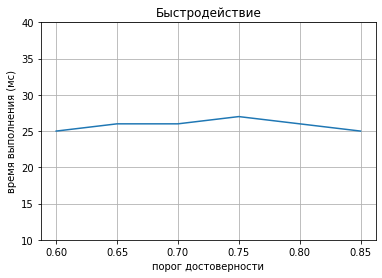

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = [0.60, 0.65, 0.70, 0.75, 0.80, 0.85]
y = [25,   26,   26,   27,   26,   25]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

ax.set_xlabel('порог достоверности')
ax.set_ylabel('время выполнения (мс)')

ax.set_title('Быстродействие')
plt.ylim([10, 40])
plt.show()

In [37]:
# 2. Количество найденных правил при изменяемом пороге достоверности
sum=0
itemsets, rules = apriori(data, min_support=0.02, min_confidence=0.80)
for i in range(len(rules)):
  sum=sum+1
print(sum)

4


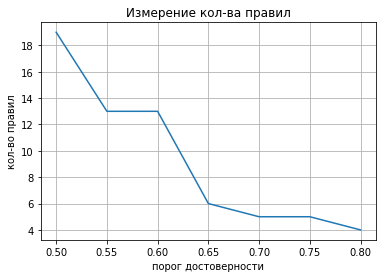

In [38]:
x = [0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80]
y = [19,   13,   13,   6,    5,    5,    4]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

ax.set_xlabel('порог достоверности')
ax.set_ylabel('кол-во правил')

ax.set_title('Измерение кол-ва правил')

plt.show()

In [60]:
# 3. Измерение максимального количества объектов в правиле
itemsets, rules = apriori(data, min_support=0.02, min_confidence=0.80)
print(len(rules[len(rules)-1]))

3


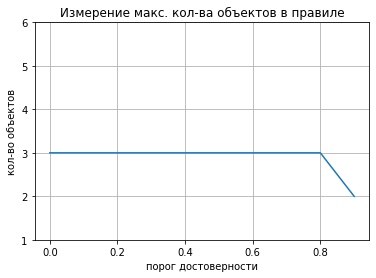

In [64]:
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = [3,   3,   3,   3,   3,   3,   3,   3,   3,   2]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

ax.set_xlabel('порог достоверности')
ax.set_ylabel('кол-во объектов')

ax.set_title('Измерение макс. кол-ва объектов в правиле')
plt.ylim([1, 6])
plt.show()

In [89]:
# 4. Количество правил, в которых антецедент и консеквент суммарно включают в себя не более семи объектов, при изменяемом пороге достоверности
sum=0
itemsets, rules = apriori(data, min_support=0.014, min_confidence=0.9)
for i in range(len(rules)):
  if len(rules[i])<8:
    sum=sum+1
print(sum)


95


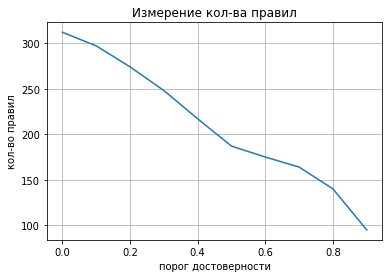

In [90]:
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = [312, 297, 274, 248, 217, 187, 175, 164, 140, 95]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

ax.set_xlabel('порог достоверности')
ax.set_ylabel('кол-во правил')

ax.set_title('Измерение кол-ва правил')

plt.show()